In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r"C:\Users\samsung\Downloads\Raisin_Dataset.csv")
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [3]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

<Axes: xlabel='Class', ylabel='count'>

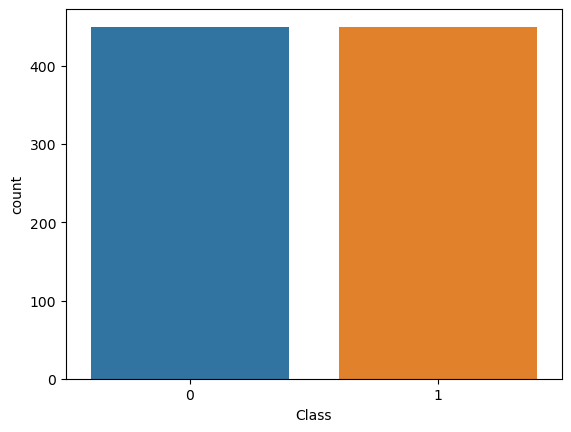

In [17]:
sns.countplot(data=df,x="Class" )

In [4]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [5]:
x = df.drop('Class', axis=1)
y = df['Class']

In [6]:
x

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,551,553,500,558,542,811,544
1,404,446,409,469,413,299,453
2,583,554,581,448,571,102,573
3,74,54,159,108,68,394,66
4,462,254,709,33,445,890,382
...,...,...,...,...,...,...,...
895,504,512,449,542,492,215,461
896,549,546,540,508,549,99,577
897,640,517,739,174,650,722,656
898,600,633,506,683,600,177,622


In [7]:
Y = pd.get_dummies(y).values

In [8]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.25,random_state=0)

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam


In [11]:
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(44, activation='relu', input_shape=(7,)))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model


model = build_model() 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 44)                352       
                                                                 
 dense_1 (Dense)             (None, 20)                900       
                                                                 
 dense_2 (Dense)             (None, 16)                336       
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 1,622
Trainable params: 1,622
Non-trainable params: 0
_________________________________________________________________


In [12]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
22/22 [==============================] - 1s 12ms/step - loss: 44.4565 - accuracy: 0.4963 - val_loss: 11.0261 - val_accuracy: 0.5511
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 6.3019 - accuracy: 0.6030 - val_loss: 3.7733 - val_accuracy: 0.7156
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 3.1084 - accuracy: 0.6963 - val_loss: 2.7851 - val_accuracy: 0.7111
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 2.0840 - accuracy: 0.7378 - val_loss: 1.7463 - val_accuracy: 0.7689
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4497 - accuracy: 0.7881 - val_loss: 1.3019 - val_accuracy: 0.7822
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 1.1106 - accuracy: 0.8104 - val_loss: 0.9374 - val_accuracy: 0.8133
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7435 - accuracy: 0.8252 - val_loss: 0.8573 - val_accuracy: 0.8178
Epoch 8/10

Epoch 59/100
22/22 [==============================] - 0s 4ms/step - loss: 0.3606 - accuracy: 0.8533 - val_loss: 0.4437 - val_accuracy: 0.8489
Epoch 60/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3711 - accuracy: 0.8430 - val_loss: 0.4393 - val_accuracy: 0.8400
Epoch 61/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3546 - accuracy: 0.8459 - val_loss: 0.5898 - val_accuracy: 0.7867
Epoch 62/100
22/22 [==============================] - 0s 5ms/step - loss: 0.4276 - accuracy: 0.8385 - val_loss: 0.4744 - val_accuracy: 0.8311
Epoch 63/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4241 - accuracy: 0.8430 - val_loss: 0.4959 - val_accuracy: 0.8311
Epoch 64/100
22/22 [==============================] - 0s 4ms/step - loss: 0.3815 - accuracy: 0.8563 - val_loss: 0.4581 - val_accuracy: 0.8667
Epoch 65/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4056 - accuracy: 0.8370 - val_loss: 0.4528 - val_accuracy: 0.8578
Epoch 

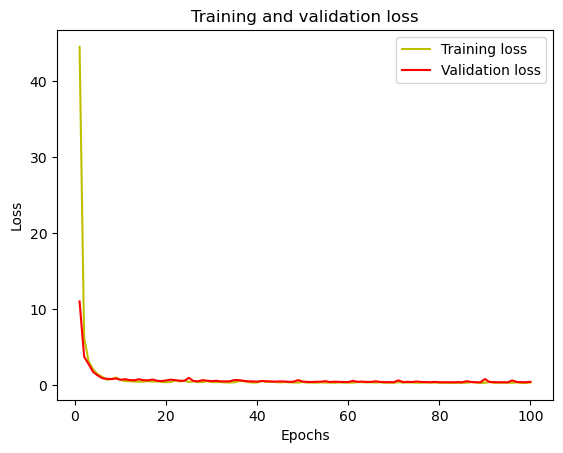

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

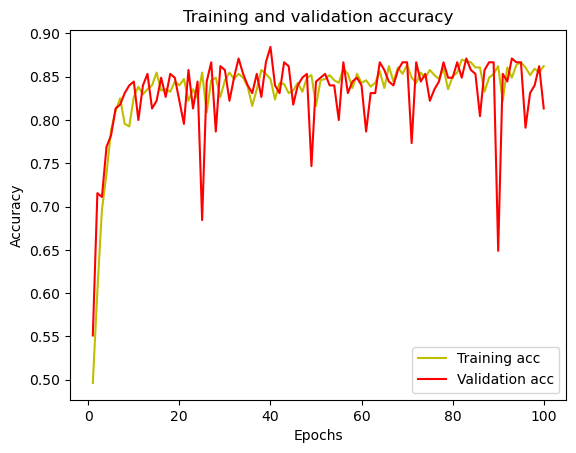

In [22]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       115
           1       0.87      0.73      0.79       110

    accuracy                           0.81       225
   macro avg       0.82      0.81      0.81       225
weighted avg       0.82      0.81      0.81       225

[[103  12]
 [ 30  80]]


In [24]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1_score(y_test_class, y_pred_class) # 0.6666666666666665

0.792079207920792

In [25]:
precision_score(y_test_class, y_pred_class) # 0.75

0.8695652173913043

In [26]:
recall_score(y_test_class, y_pred_class)

0.7272727272727273